In [458]:
#импорт библиотек для работы
import pandas as pd

In [459]:
import numpy as np

In [460]:
import matplotlib.pyplot as plt

In [461]:
import seaborn as sns

In [462]:
#считывание данных
data = pd.read_excel('Base.xlsx', sheet_name=0)

In [463]:
#показать верхушку таблицы - чтобы увидеть переменные
data.head()

,ГК/Филиал,Подразделение,Департамент,Отдел,Должность,Номер,ФИО,Ставка,ФОТ,Регион,Уровень необходимой квалификации,Уровень свободы в принятии решений,Роль в формировании методологии и правил своего подразделения,Роль в формировании методологии и правил Компании,Количество людей в административном подчинении,"Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении",Цель общения внутри Компании,Годовой объём прямого влияния на финансовый результат Компании,Стоимость разовой ошибки
0,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,1424452,Ячменькова Пелагея Андрияновна,1.0,90000.0,москва,4.0,3.0,1,1,1,1.0,2,1,1
1,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,6667954,Горелов Архип Геннадиевич,1.0,90000.0,москва,4.0,3.0,1,1,1,1.0,2,1,1
2,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7284288,Яшнова Лилия Владиленовна,1.0,130000.0,москва,4.0,2.0,1,1,1,1.0,2,1,1
3,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7586757,Абоймова Ефросинья Ильевна,1.0,130000.0,москва,4.0,2.0,1,1,1,1.0,2,1,1
4,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Ведущий специалист,9855738,Халимдаров Яков Яковович,1.0,55000.0,москва,2.0,2.0,1,1,1,1.0,2,1,1


In [464]:
#переименовать переменные для удобства обращения
data.columns = ['Office','Branch','Department','Unit','Position','Number','Name','Rate','Pay','Region','Cr1','Cr2','Cr3','Cr4','Cr5','Cr6','Cr7','Cr8','Cr9']
data.head()

,Office,Branch,Department,Unit,Position,Number,Name,Rate,Pay,Region,Cr1,Cr2,Cr3,Cr4,Cr5,Cr6,Cr7,Cr8,Cr9
0,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,1424452,Ячменькова Пелагея Андрияновна,1.0,90000.0,москва,4.0,3.0,1,1,1,1.0,2,1,1
1,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,6667954,Горелов Архип Геннадиевич,1.0,90000.0,москва,4.0,3.0,1,1,1,1.0,2,1,1
2,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7284288,Яшнова Лилия Владиленовна,1.0,130000.0,москва,4.0,2.0,1,1,1,1.0,2,1,1
3,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7586757,Абоймова Ефросинья Ильевна,1.0,130000.0,москва,4.0,2.0,1,1,1,1.0,2,1,1
4,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Ведущий специалист,9855738,Халимдаров Яков Яковович,1.0,55000.0,москва,2.0,2.0,1,1,1,1.0,2,1,1


In [465]:
#удалить строки(=сотрудников), где значение 1 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr1 > 6) | (data.Cr1 < 1)].index)

In [466]:
#удалить строки(=сотрудников), где значение 2 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr2 > 5) | (data.Cr2 < 1)].index)

In [467]:
#удалить строки(=сотрудников), где значение 3 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr3 > 3) | (data.Cr3 < 1)].index)

In [468]:
#удалить строки(=сотрудников), где значение 4 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr4 > 4) | (data.Cr4 < 1)].index)

In [469]:
#удалить строки(=сотрудников), где значение 5 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr5 > 5) | (data.Cr5 < 1)].index)

In [470]:
#удалить строки(=сотрудников), где значение 6 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr6 > 4) | (data.Cr6 < 1)].index)

In [471]:
#удалить строки(=сотрудников), где значение 7 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr7 > 3) | (data.Cr7 < 1)].index)

In [472]:
#удалить строки(=сотрудников), где значение 8 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr8 > 5) | (data.Cr8 < 1)].index)

In [473]:
#удалить строки(=сотрудников), где значение 9 критерия не удовлетворяет условиям из ТЗ
data = data.drop(data[(data.Cr9 > 5) | (data.Cr9 < 1)].index)

In [474]:
#общая инфо о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2068
Data columns (total 19 columns):
Office        2063 non-null object
Branch        2063 non-null object
Department    1755 non-null object
Unit          1483 non-null object
Position      2063 non-null object
Number        2063 non-null int64
Name          2063 non-null object
Rate          2063 non-null float64
Pay           2063 non-null float64
Region        2063 non-null object
Cr1           2062 non-null float64
Cr2           2062 non-null float64
Cr3           2063 non-null int64
Cr4           2063 non-null int64
Cr5           2063 non-null int64
Cr6           2062 non-null float64
Cr7           2063 non-null int64
Cr8           2063 non-null int64
Cr9           2063 non-null int64
dtypes: float64(5), int64(7), object(7)
memory usage: 322.3+ KB


In [475]:
#удаляем строки, где в столбцах с критериями отсутствуют данные (есть пустые ячейки)
data.dropna(subset=['Cr1'], inplace=True)

In [476]:
#удаляем строки, где в столбцах с критериями отсутствуют данные (есть пустые ячейки)
data.dropna(subset=['Cr2'], inplace=True)

In [477]:
#удаляем строки, где в столбцах с критериями отсутствуют данные (есть пустые ячейки)
data.dropna(subset=['Cr6'], inplace=True)

In [478]:
#считаем оклад сотрудников - ФОТ при полной ставке, добавляем в таблицу в качестве отдельной колонки-переменной
data['Pay_for_1'] = 1/data['Rate']*data['Pay']

In [479]:
#удалить строки(=сотрудников), где значение ФОТ при полной ставке меньше МРОТ (=12130), т.к. это нарушение законодательства
data = data.drop(data[data.Pay_for_1 < 12130].index)

In [480]:
#общая инфо после очистки данных - видим, что по итогу оставляем для анализа 1995 сотрудников (также есть сотрудники с пустыми значениями в полях Департамент и Отдел, но мы не считаем это ошибкой, т.к. такое имеет право на существование в зависимости от структуры компании)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2068
Data columns (total 20 columns):
Office        1995 non-null object
Branch        1995 non-null object
Department    1723 non-null object
Unit          1456 non-null object
Position      1995 non-null object
Number        1995 non-null int64
Name          1995 non-null object
Rate          1995 non-null float64
Pay           1995 non-null float64
Region        1995 non-null object
Cr1           1995 non-null float64
Cr2           1995 non-null float64
Cr3           1995 non-null int64
Cr4           1995 non-null int64
Cr5           1995 non-null int64
Cr6           1995 non-null float64
Cr7           1995 non-null int64
Cr8           1995 non-null int64
Cr9           1995 non-null int64
Pay_for_1     1995 non-null float64
dtypes: float64(6), int64(7), object(7)
memory usage: 327.3+ KB


In [481]:
#импортируем инструментарий для создания регресионной модели
from sklearn.linear_model import LinearRegression

In [482]:
#создаем регрессионную модель (зависимая переменная - оклад, независимые - критерии)
x = data[['Cr1', 'Cr2', 'Cr3', 'Cr4', 'Cr5', 'Cr6', 'Cr7', 'Cr8', 'Cr9']].values
y = data['Pay_for_1'].values

In [483]:
x.shape, y.shape

((1995L, 9L), (1995L,))

In [484]:
model = LinearRegression()

In [485]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [486]:
cfs = model.coef_

In [487]:
cfs

array([ 21100.17975893,  12186.33441278, -11020.43983518,  23564.23630674,
        11450.6037675 ,  -4476.87230015,   5997.0257333 ,   7772.6209408 ,
        10306.28353838])

In [488]:
#рассчитываем интегральный балл
ball = []
for i in range(x.shape[0]):
    ball.append(sum(x[i] * cfs))

In [489]:
#добавляем интегральный балл в таблицу в качестве отдельной колонки-переменной
data['Integr_ball'] = ball

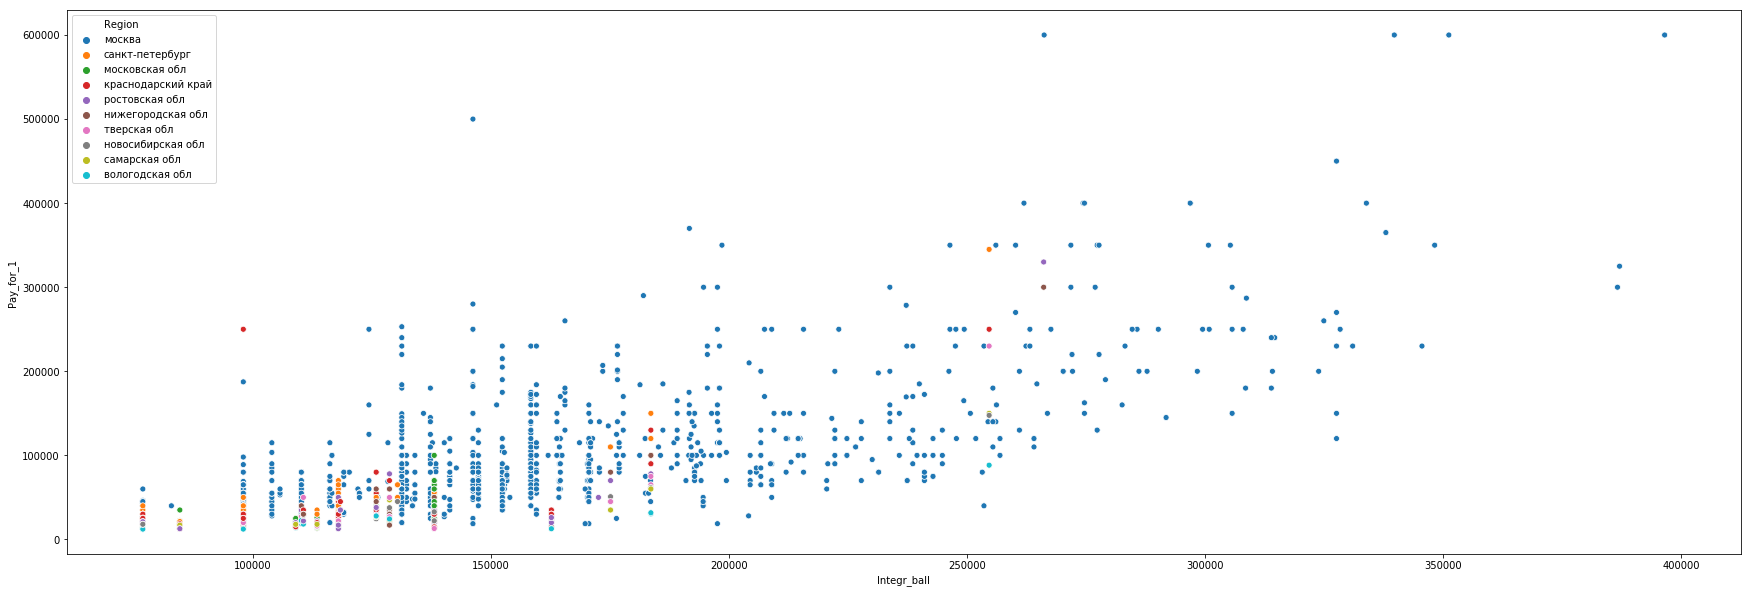

In [490]:
#определяем региональный коэффициент через зависимость интегрального балла от региона, в котором работает сотрудник, для этого ищем множество значений интегрального балла, куда попадают сотрудники из всех регионов
#визуализируем
plt.figure(figsize=(30, 10))
sns.scatterplot(data=data, x='Integr_ball', y='Pay_for_1', hue="Region");

In [491]:
#группируем данные (исходя из интегрального балла) по регионам, выводим минимум, максимум
data.groupby('Region')['Integr_ball'].agg(['min', 'max'])

,min,max
Region,,
вологодская обл,76879.972323,254602.929479
краснодарский край,76879.972323,254602.929479
москва,76879.972323,396459.505572
московская обл,76879.972323,138072.784947
нижегородская обл,76879.972323,266053.533247
новосибирская обл,76879.972323,254602.929479
ростовская обл,76879.972323,266053.533247
самарская обл,76879.972323,254602.929479
санкт-петербург,76879.972323,254602.929479


In [492]:
#берем множество значений интегрального балла, куда попадают сотрудники из всех регионов
table = data[(data['Integr_ball']>=76879) & (data['Integr_ball']<=100000)].groupby('Region')['Pay_for_1'].agg('mean')

In [493]:
table = table.reset_index()

In [494]:
#выводим таблицу
table

,Region,Pay_for_1
0,вологодская обл,13243.000000
1,краснодарский край,26824.648649
2,москва,39463.150838
3,московская обл,18610.214286
4,нижегородская обл,20771.875000
5,новосибирская обл,18860.000000
6,ростовская обл,18074.551724
7,самарская обл,20033.333333
8,санкт-петербург,27920.731707
9,тверская обл,20222.222222


In [495]:
#региональный коэффициент - устанавливаем как 1 для Москвы, для остальных регионов считаем
table['Region_coef'] = table['Pay_for_1'] / table.at[2,'Pay_for_1']

In [496]:
#выводим таблицу с региональным коэффициентом
table

,Region,Pay_for_1,Region_coef
0,вологодская обл,13243.000000,0.335579
1,краснодарский край,26824.648649,0.679739
2,москва,39463.150838,1.000000
3,московская обл,18610.214286,0.471585
4,нижегородская обл,20771.875000,0.526361
5,новосибирская обл,18860.000000,0.477914
6,ростовская обл,18074.551724,0.458011
7,самарская обл,20033.333333,0.507647
8,санкт-петербург,27920.731707,0.707514
9,тверская обл,20222.222222,0.512433


In [497]:
#объединяем таблицы, добавляем столбец со значением регионального коэффициента
data = data.merge(table[['Region', 'Region_coef']])

In [498]:
#описание распределения интегрального балла
data['Integr_ball'].describe()

count      1995.000000
mean     141396.405015
std       50050.257509
min       76879.972323
25%      110166.486495
50%      131266.666254
75%      159529.766324
max      396459.505572
Name: Integr_ball, dtype: float64

In [499]:
#выводим общую таблицу с данными, видим значения интегрального балла и регионального коэффициента
data

,Office,Branch,Department,Unit,Position,Number,Name,Rate,Pay,Region,...,Cr3,Cr4,Cr5,Cr6,Cr7,Cr8,Cr9,Pay_for_1,Integr_ball,Region_coef
0,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,1424452,Ячменькова Пелагея Андрияновна,1.0,90000.00000,москва,...,1,1,1,1.0,2,1,1,90000.00000,170550.206159,1.000000
1,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,6667954,Горелов Архип Геннадиевич,1.0,90000.00000,москва,...,1,1,1,1.0,2,1,1,90000.00000,170550.206159,1.000000
2,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7284288,Яшнова Лилия Владиленовна,1.0,130000.00000,москва,...,1,1,1,1.0,2,1,1,130000.00000,158363.871746,1.000000
3,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7586757,Абоймова Ефросинья Ильевна,1.0,130000.00000,москва,...,1,1,1,1.0,2,1,1,130000.00000,158363.871746,1.000000
4,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Ведущий специалист,9855738,Халимдаров Яков Яковович,1.0,55000.00000,москва,...,1,1,1,1.0,2,1,1,55000.00000,116163.512228,1.000000
5,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Заместитель руководителя департамента,5703915,Малинина Наталия Вячеславовна,1.0,210000.00000,москва,...,2,2,1,1.0,2,1,1,210000.00000,204194.182389,1.000000
6,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Руководитель департамента,5853770,Радостина Анна Игнатиевна,1.0,250000.00000,москва,...,3,3,2,1.0,3,1,1,250000.00000,246371.942774,1.000000
7,Головная компания,Блок андеррайтинга,Департамент оперативного андеррайтинга,Отдел технической оценки риска,Ведущий специалист,4198456,Гика Светлана Игоревна,1.0,60000.00000,москва,...,1,1,1,1.0,1,1,1,60000.00000,131266.666254,1.000000
8,Головная компания,Блок андеррайтинга,Департамент оперативного андеррайтинга,Отдел технической оценки риска,Ведущий специалист,4524188,Досаев Чеслав Модестович,1.0,60000.00000,москва,...,1,1,1,1.0,1,1,1,60000.00000,131266.666254,1.000000
9,Головная компания,Блок андеррайтинга,Департамент оперативного андеррайтинга,Отдел технической оценки риска,Ведущий специалист,6454181,Якуткин Юлий Венедиктович,1.0,60000.00000,москва,...,1,1,1,1.0,1,1,1,60000.00000,131266.666254,1.000000


In [500]:
#приступаем к расчету грейдов, согласно ТЗ - нам необходимо задать 12 грейдов
grades = np.array_split(range(int(data['Integr_ball'].min()), int(data['Integr_ball'].max())), 12)

In [501]:
def grades_function(x):
  for i, grade in enumerate(grades):
    if int(x) in grade:
      return int(i+1)

In [502]:
#добавляем столбец с грейдом, считаем
data['Grade'] = data['Integr_ball'].apply(grades_function, 0)

In [503]:
#считаем медианное значение оклада в грейде для дальнейшего расчета вилки, принимаем его за целевой доход 
pay_in_grades = data.groupby('Grade')['Pay_for_1'].agg('median').reset_index()

In [504]:
#переименовываем колонки
pay_in_grades.rename(columns={'Pay_for_1': 'Grade_median_pay'}, inplace=True)

In [505]:
#выводим таблицу с медианным значением оклада в грейде
pay_in_grades

,Grade,Grade_median_pay
0,1,25000.0
1,2,33000.0
2,3,65000.0
3,4,85000.0
4,5,100000.0
5,6,120000.0
6,7,143800.0
7,8,220000.0
8,9,250000.0
9,10,255000.0


In [506]:
#подход к расчету оклада в грейде согласно методике ЭКОПСИ - на нижних грейдах размах зарплатной вилки меньше, чем на верхних
#при этом согласно ТЗ размах зарплатной вилки не должен превышать +-30% от медианы
#считаем: 30%/12=2.5% - шаг изменений на каждом грейде
#1 грейд +-2.5%
#2 грейд +-5%
#3 грейд +-7.5%
#4 грейд +10%
#5 грейд +-12.5%
#6 грейд +-15%
#7 грейд +-17.5%
#8 грейд +-20%
#9 грейд +-22.5
#10 грейд +-25%
#11 грейд +-27.5%
#12 грейд +-30%
pay_in_grades['Coef'] = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]

In [507]:
#считаем минимальное значение вилки
pay_in_grades['Pay_range_min'] = pay_in_grades['Grade_median_pay'] - pay_in_grades['Grade_median_pay'] * pay_in_grades['Coef']

In [508]:
#считаем максимальное значение вилки
pay_in_grades['Pay_range_max'] = pay_in_grades['Grade_median_pay'] + pay_in_grades['Grade_median_pay'] * pay_in_grades['Coef']

In [509]:
#выводим таблицу со значениями оплаты по грейдам
pay_in_grades

,Grade,Grade_median_pay,Coef,Pay_range_min,Pay_range_max
0,1,25000.0,0.025,24375.0,25625.0
1,2,33000.0,0.050,31350.0,34650.0
2,3,65000.0,0.075,60125.0,69875.0
3,4,85000.0,0.100,76500.0,93500.0
4,5,100000.0,0.125,87500.0,112500.0
5,6,120000.0,0.150,102000.0,138000.0
6,7,143800.0,0.175,118635.0,168965.0
7,8,220000.0,0.200,176000.0,264000.0
8,9,250000.0,0.225,193750.0,306250.0
9,10,255000.0,0.250,191250.0,318750.0


In [510]:
#объединяем таблицы
data = data.merge(pay_in_grades)

In [511]:
#выводим верхушку таблицы
data.head()

,Office,Branch,Department,Unit,Position,Number,Name,Rate,Pay,Region,...,Cr8,Cr9,Pay_for_1,Integr_ball,Region_coef,Grade,Grade_median_pay,Coef,Pay_range_min,Pay_range_max
0,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,1424452,Ячменькова Пелагея Андрияновна,1.0,90000.0,москва,...,1,1,90000.0,170550.206159,1.0,4,85000.0,0.1,76500.0,93500.0
1,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,6667954,Горелов Архип Геннадиевич,1.0,90000.0,москва,...,1,1,90000.0,170550.206159,1.0,4,85000.0,0.1,76500.0,93500.0
2,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7284288,Яшнова Лилия Владиленовна,1.0,130000.0,москва,...,1,1,130000.0,158363.871746,1.0,4,85000.0,0.1,76500.0,93500.0
3,Головная компания,Блок андеррайтинга,Департамент бизнес-анализа и технологий,NaN,Аналитик,7586757,Абоймова Ефросинья Ильевна,1.0,130000.0,москва,...,1,1,130000.0,158363.871746,1.0,4,85000.0,0.1,76500.0,93500.0
4,Головная компания,Блок андеррайтинга,NaN,NaN,Вице-президент,2160599,Абушаева Ирина Леонидовна,1.0,290000.0,москва,...,1,1,290000.0,182000.809926,1.0,4,85000.0,0.1,76500.0,93500.0


In [512]:
#удаляем столбцы, ненужные для итоговой таблицы
data.drop(['Office', 'Branch', 'Department', 'Unit', 'Rate', 'Pay', 'Region', 'Cr1', 'Cr2', 'Cr3', 'Cr4', 'Cr5', 'Cr6', 'Cr7', 'Cr8', 'Cr9', 'Pay_for_1', 'Coef'], axis='columns', inplace=True)

In [513]:
#выводим верхушку таблицы
data.head()

,Position,Number,Name,Integr_ball,Region_coef,Grade,Grade_median_pay,Pay_range_min,Pay_range_max
0,Аналитик,1424452,Ячменькова Пелагея Андрияновна,170550.206159,1.0,4,85000.0,76500.0,93500.0
1,Аналитик,6667954,Горелов Архип Геннадиевич,170550.206159,1.0,4,85000.0,76500.0,93500.0
2,Аналитик,7284288,Яшнова Лилия Владиленовна,158363.871746,1.0,4,85000.0,76500.0,93500.0
3,Аналитик,7586757,Абоймова Ефросинья Ильевна,158363.871746,1.0,4,85000.0,76500.0,93500.0
4,Вице-президент,2160599,Абушаева Ирина Леонидовна,182000.809926,1.0,4,85000.0,76500.0,93500.0


In [525]:
#переименовываем (переводим названия столбцов на русский) 
data.columns = ['Должность','Номер','ФИО','Интегральный балл','Региональный коэффициент','Грейд','Целевой доход','Нижняя граница вилки зп', 'Верхняя граница вилки зп']
data

,Должность,Номер,ФИО,Интегральный балл,Региональный коэффициент,Грейд,Целевой доход,Нижняя граница вилки зп,Верхняя граница вилки зп
0,Аналитик,1424452,Ячменькова Пелагея Андрияновна,170550.206159,1.000000,4,85000.0,76500.0,93500.0
1,Аналитик,6667954,Горелов Архип Геннадиевич,170550.206159,1.000000,4,85000.0,76500.0,93500.0
2,Аналитик,7284288,Яшнова Лилия Владиленовна,158363.871746,1.000000,4,85000.0,76500.0,93500.0
3,Аналитик,7586757,Абоймова Ефросинья Ильевна,158363.871746,1.000000,4,85000.0,76500.0,93500.0
4,Вице-президент,2160599,Абушаева Ирина Леонидовна,182000.809926,1.000000,4,85000.0,76500.0,93500.0
5,Ведущий специалист,4678263,Кучава Лукьян Леонович,164553.180425,1.000000,4,85000.0,76500.0,93500.0
6,Ведущий специалист,8423855,Яцко Евстигней Чеславович,164553.180425,1.000000,4,85000.0,76500.0,93500.0
7,Главный специалист,8462128,Лебедков Глеб Самуилович,164553.180425,1.000000,4,85000.0,76500.0,93500.0
8,Специалист,9885141,Царицын Виссарион Денисович,164553.180425,1.000000,4,85000.0,76500.0,93500.0
9,Главный специалист,3934829,Кулагин Артем Аполлинариевич,176547.231892,1.000000,4,85000.0,76500.0,93500.0


In [527]:
# вывести результат в файл эксель
data = pd.DataFrame(data)
writer = pd.ExcelWriter('result.xlsx', engine='xlsxwriter')
data.to_excel(writer, sheet_name='Sheet1')
writer.save()